# Gaussian processes

A Gaussian process is a stochastic process, that is indexed collection of random variables, such that a joint distribution of every finite set of variables follow multidimensional normal distribution. Within the scope of this notebook we will index variables by $x \in \mathbb{R}^{n}$, which naturally leads to the interpretation of probability distribution in a given point of space. 

A Gaussian process is parameterized by the mean function $m(x)$ and the covariance function $k(x_1 , x_2)$, called **kernel**, so that:

$$m(x) = E[f (x)] \ \ \ for \ all \ x, $$
$$k(x_1 , x_2 ) = Cov[f (x_1 ), f (x_2 )], \ \ for \ all \ x_1 , x_2 .$$
We then denote $f ∼ GP(m(x), k(x_1 , x_2 )).$

The covariance function $k(x_1 , x_2 )$ has to be [positive definite](https://en.wikipedia.org/wiki/Positive-definite_function).




Our problem will be usually posed as follows. We have observed values $y_{1}, \dots, y_{N}$ of $f$ in points $x_{1}, \dots, x_{N}$ and know the covariance function $k(x_1 , x_2 )$. Based on that, we want to estimate what is the probability distribution at some other point $x_{*}$. This is possible, and in fact easy, thanks to the regular structure of normal distribution. Exact formulas can be found [here](https://indico.desy.de/indico/event/22731/session/5/contribution/12/material/slides/0.pdf), pages 10-11.

# Kernels

The most important kernels and their formulas are listed below:

###  Radial Basis Function (RBF) aka Exponential Quadratic Kernel:
$$ k(x_a, x_b) = \sigma^2 \exp \left(-\frac{ \left\Vert x_a - x_b \right\Vert^2}{2\ell^2}\right), $$

where $\ell$ is the lengthscale parameter and $\sigma^{2}$ is the overall variance.

### Rational quadratic kernel:
$$ k(x_a, x_b) = \sigma^2 \left( 1 + \frac{ \left\Vert x_a - x_b \right\Vert^2}{2 \alpha \ell^2} \right)^{-\alpha} $$

where $\ell$ is the lengthscale parameter, $\alpha$ is the scale-mixture parameter and $\sigma^{2}$ is the overall variance.

### Exp-Sine-Squared kernel:
$$ k(x_a, x_b) = \sigma^2 \exp \left(-\frac{2}{\ell^2}\sin^2 \left( \pi \frac{\lvert x_a - x_b \rvert}{p}\right) \right)$$
where $\ell$ is the lengthscale parameter, $p$ is the periodicity and $\sigma^{2}$ is the overall variance.

### White noise kernel:
$$ k(x_a, x_b) = \delta(x_a- x_b)$$

### Constant kernel:
$$ k(x_a, x_b) = 1$$



# Ex 1

Visualize kernels listed above with a plot of $x_a - x_b$ and corresponding heatmaps. Play with kernel parameters.

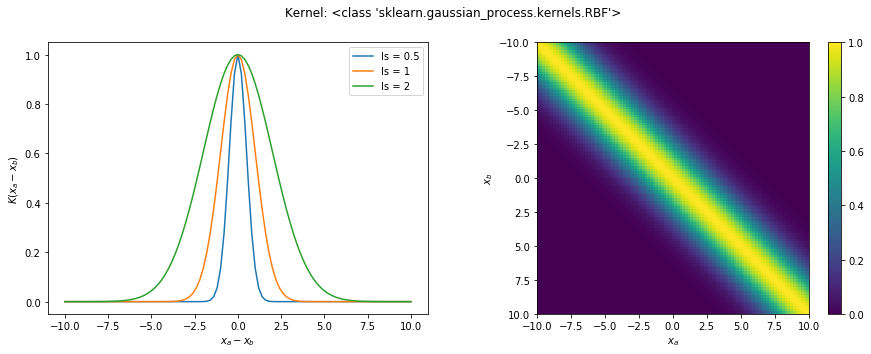

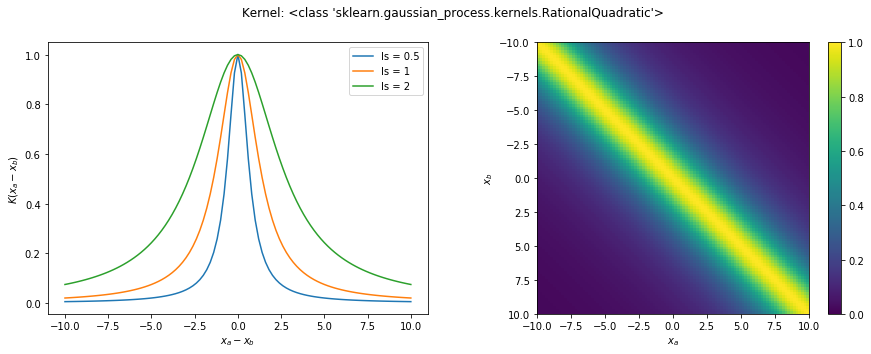

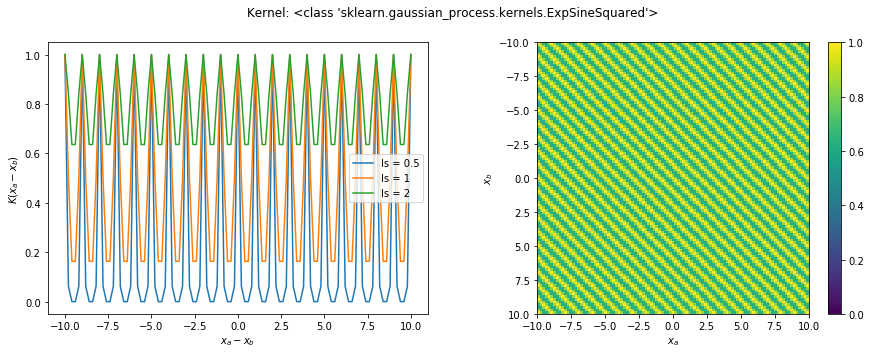

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from sklearn.gaussian_process.kernels import (RBF, RationalQuadratic,
                                              ExpSineSquared,
                                              ConstantKernel, WhiteKernel)

for kernel_type in [RBF, RationalQuadratic,ExpSineSquared]:
    
    plt.figure(figsize=(15,5))
    plt.suptitle("Kernel: "+ str(kernel_type))
    plt.subplot(1,2,1)
    plt.xlabel(r"$x_{a} - x_{b}$")
    plt.ylabel(r"$K(x_{a} - x_{b})$")
    kernel = kernel_type(length_scale = 0.5)
    plt.plot(np.linspace(-10,10,101), kernel.__call__(X=np.abs(np.linspace(-10,10,101))[:, np.newaxis])[50], label = "ls = 0.5")
    
    
    kernel = kernel_type(length_scale = 1)
    plt.plot(np.linspace(-10,10,101), kernel.__call__(X=np.abs(np.linspace(-10,10,101))[:, np.newaxis])[50], label = "ls = 1")
    
    
    
    kernel = kernel_type(length_scale = 2)
    plt.plot(np.linspace(-10,10,101), kernel.__call__(X=np.abs(np.linspace(-10,10,101))[:, np.newaxis])[50], label = "ls = 2")
    plt.legend()

    plt.subplot(1,2,2)
    im = plt.imshow(kernel.__call__(X=(np.linspace(-10,10,101))[:, np.newaxis]), extent = [-10,10,10,-10], vmin =0 , vmax = 1)
    
    plt.xlabel(r"$x_{a}$")
    plt.ylabel(r"$x_{b}$")
    plt.colorbar()
    
    
    plt.show()
    


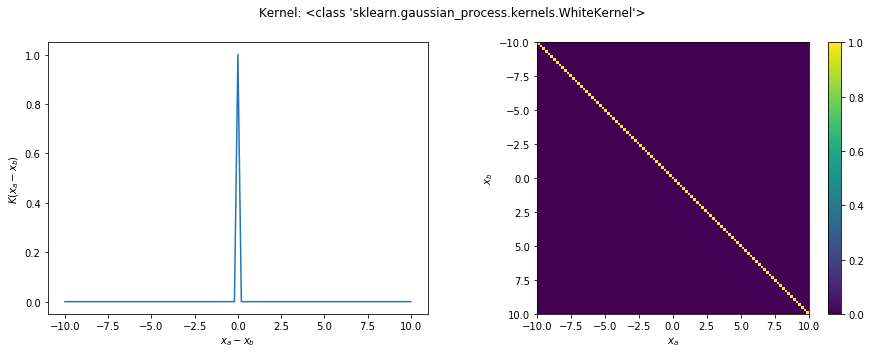

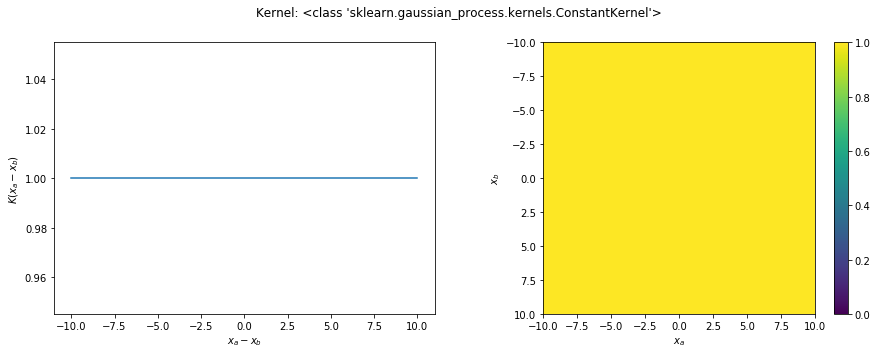

In [2]:
for kernel_type in [WhiteKernel, ConstantKernel]:
    
    plt.figure(figsize=(15,5))
    plt.suptitle("Kernel: "+ str(kernel_type))
    plt.subplot(1,2,1)
    plt.xlabel(r"$x_{a} - x_{b}$")
    plt.ylabel(r"$K(x_{a} - x_{b})$")
    kernel = kernel_type()
    plt.plot(np.linspace(-10,10,101), kernel.__call__(X=np.abs(np.linspace(-10,10,101))[:, np.newaxis])[50], label = "ls = 0.5")
    


    plt.subplot(1,2,2)
    im = plt.imshow(kernel.__call__(X=(np.linspace(-10,10,101))[:, np.newaxis]), extent = [-10,10,10,-10], vmin =0 , vmax = 1)
    
    plt.xlabel(r"$x_{a}$")
    plt.ylabel(r"$x_{b}$")
    plt.colorbar()
    
    
    plt.show()

# Ex 2

Using sklearn library, plot examples of gaussian processes with kernel functions from previous exercise. What information is carried in every kernel? Which should be used for:    
a) periodic data?,    
b) noise?    
c) smoothly evolving process?    
d) constant process?

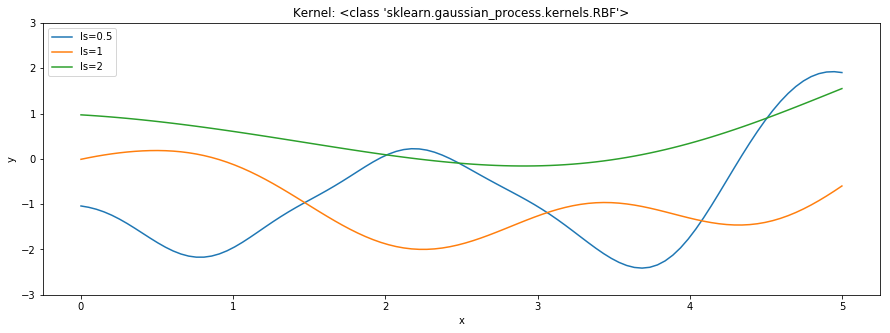

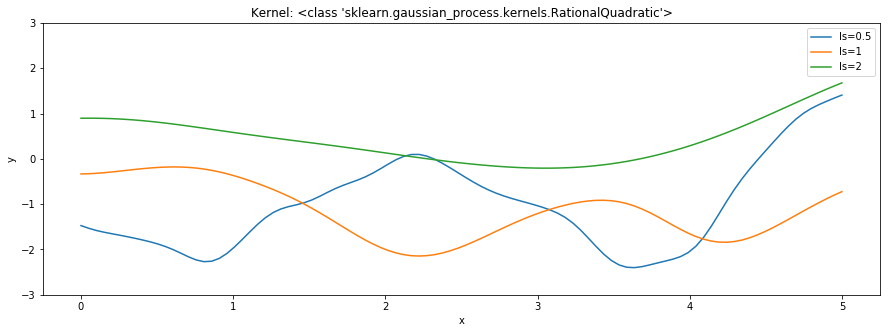

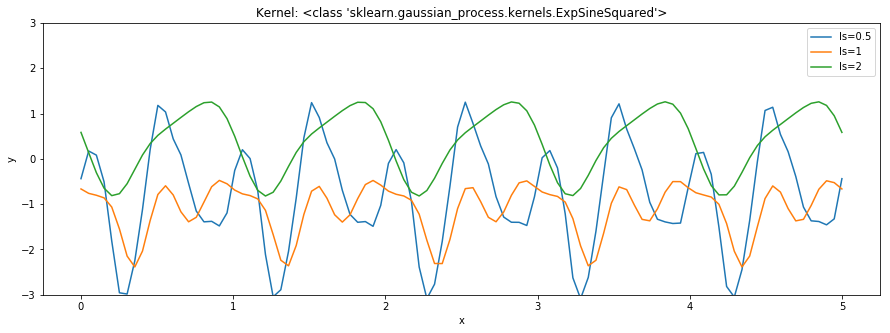

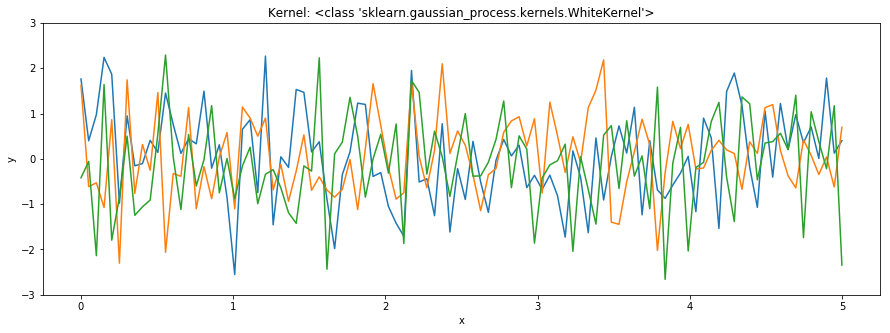

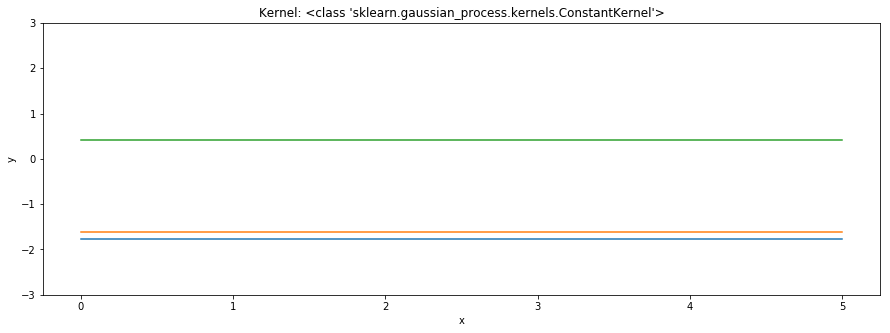

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor


for kernel_type in [RBF, RationalQuadratic,ExpSineSquared]:
    rng = np.random.RandomState(3)

    
    
    X_ = np.linspace(0, 5, 100)
    
    plt.figure(figsize=(15, 5))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim(-3,3)
    
    plt.title("Kernel: "+ str(kernel_type))
    lss = [0.5,1,2]
    for i in range(3):
        kernel = kernel_type(length_scale = lss[i])
        gp = GaussianProcessRegressor(kernel=kernel, optimizer=None)
        y_sample = gp.sample_y(X_[:, np.newaxis], random_state=i)

        plt.plot(X_, y_sample, label ="ls={0}".format(lss[i]) )
        plt.legend()
        
for kernel_type in [WhiteKernel, ConstantKernel]:
    rng = np.random.RandomState(3)

    kernel = kernel_type()
    gp = GaussianProcessRegressor(kernel=kernel, optimizer=None)
    
    X_ = np.linspace(0, 5, 100)
    
    plt.figure(figsize=(15, 5))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim(-3,3)
    
    plt.title("Kernel: "+ str(kernel_type))
    for i in range(3):
        y_sample = gp.sample_y(X_[:, np.newaxis], random_state=i)

        plt.plot(X_, y_sample)

a) periodic data: ExpSineSquared kernel   
b) noise: White Kernel   
c) smoothly evolving process: RBF or Rational Quadratic   
d) constant process: Constant Kernel

# Mixed kernels


# Ex 3
Visulize the following composite kernels. What can be their interpretation?    
a) Product of RBF and ExpSineSquared,    
b) Sum of ExpSineSquared and WhiteKernel (noise_level = 0.05),    
c) Sum of RBF and WhiteKernel (noise_level = 0.05),    
d) Sum of RBF and ExpSineSquared (length_scale = 0.25, weight = 0.05),    


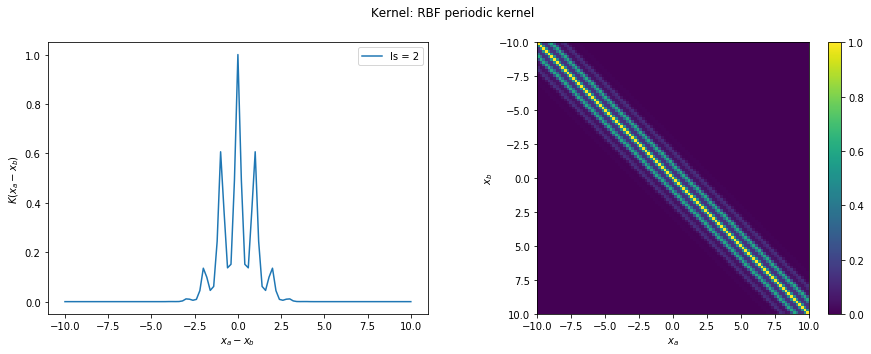

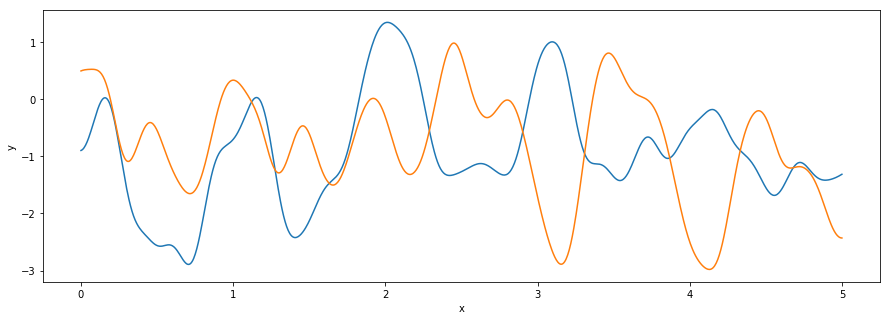

In [4]:
#a)

RBF_period_kernel = RBF() * ExpSineSquared()

plt.figure(figsize=(15,5))
plt.suptitle("Kernel: RBF periodic kernel")
plt.subplot(1,2,1)
plt.xlabel(r"$x_{a} - x_{b}$")
plt.ylabel(r"$K(x_{a} - x_{b})$")

plt.plot(np.linspace(-10,10,101), RBF_period_kernel.__call__(X=np.abs(np.linspace(-10,10,101))[:, np.newaxis])[50], label = "ls = 2")
plt.legend()

plt.subplot(1,2,2)
im = plt.imshow(RBF_period_kernel.__call__(X=(np.linspace(-10,10,101))[:, np.newaxis]), extent = [-10,10,10,-10], vmin =0 , vmax = 1)

plt.xlabel(r"$x_{a}$")
plt.ylabel(r"$x_{b}$")
plt.colorbar()


plt.show()





gp = GaussianProcessRegressor(kernel=RBF_period_kernel, optimizer=None)
    
X_ = np.linspace(0, 5, 1000)

plt.figure(figsize=(15, 5))
plt.xlabel("x")
plt.ylabel("y")

for i in range(2):
    y_sample = gp.sample_y(X_[:, np.newaxis], random_state=i)

    plt.plot(X_, y_sample)

#### Interpretation:    
Locally periodic process. RBF lengthscale serves as "memory" parameter, the bigger, the more we remember.

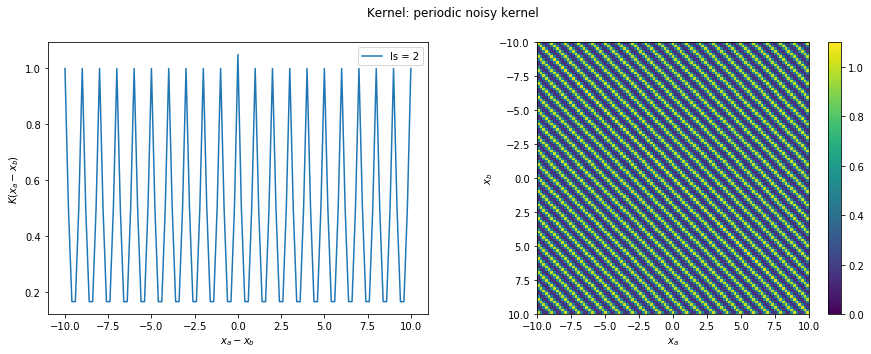

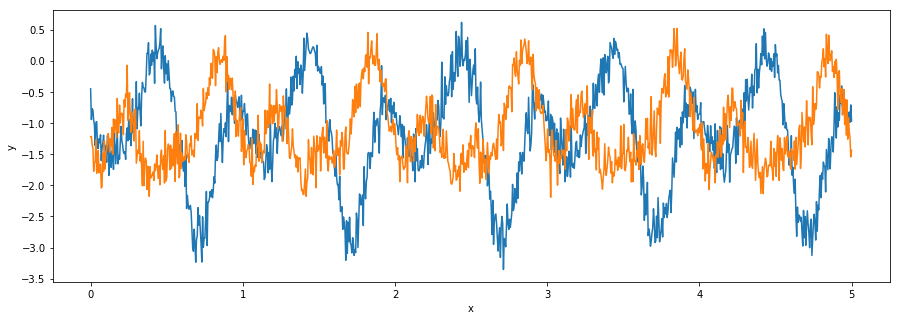

In [5]:
#b)

RBF_period_kernel = ExpSineSquared() + WhiteKernel(noise_level = 0.05)

plt.figure(figsize=(15,5))
plt.suptitle("Kernel: periodic noisy kernel")
plt.subplot(1,2,1)
plt.xlabel(r"$x_{a} - x_{b}$")
plt.ylabel(r"$K(x_{a} - x_{b})$")

plt.plot(np.linspace(-10,10,101), RBF_period_kernel.__call__(X=np.abs(np.linspace(-10,10,101))[:, np.newaxis])[50], label = "ls = 2")
plt.legend()

plt.subplot(1,2,2)
im = plt.imshow(RBF_period_kernel.__call__(X=(np.linspace(-10,10,101))[:, np.newaxis]), extent = [-10,10,10,-10], vmin =0 , vmax = 1.1)

plt.xlabel(r"$x_{a}$")
plt.ylabel(r"$x_{b}$")
plt.colorbar()


plt.show()





gp = GaussianProcessRegressor(kernel=RBF_period_kernel, optimizer=None)
    
X_ = np.linspace(0, 5, 1000)

plt.figure(figsize=(15, 5))
plt.xlabel("x")
plt.ylabel("y")
#plt.ylim(-4,4)

for i in range(2):
    y_sample = gp.sample_y(X_[:, np.newaxis], random_state=i)

    plt.plot(X_, y_sample)

#### Interpretation:    
Noisy periodic process.

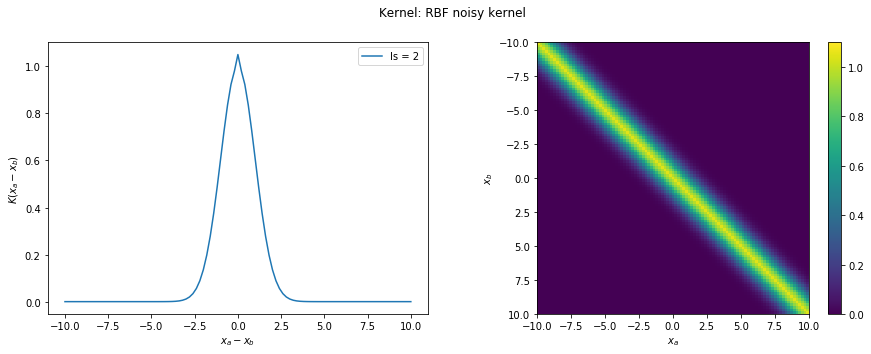

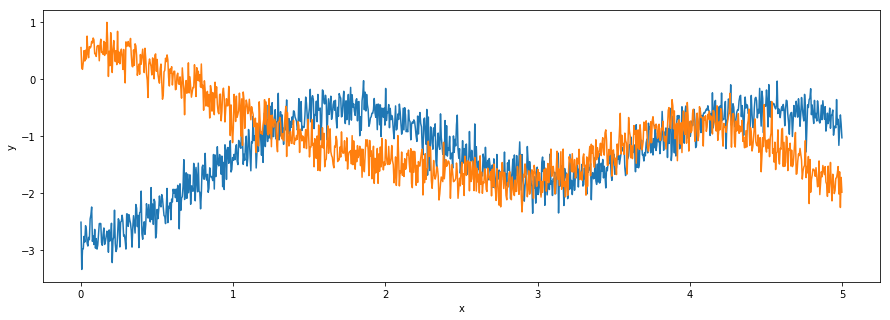

In [6]:
#c)

RBF_period_kernel = RBF() + WhiteKernel(noise_level = 0.05)

plt.figure(figsize=(15,5))
plt.suptitle("Kernel: RBF noisy kernel")
plt.subplot(1,2,1)
plt.xlabel(r"$x_{a} - x_{b}$")
plt.ylabel(r"$K(x_{a} - x_{b})$")

plt.plot(np.linspace(-10,10,101), RBF_period_kernel.__call__(X=np.abs(np.linspace(-10,10,101))[:, np.newaxis])[50], label = "ls = 2")
plt.legend()

plt.subplot(1,2,2)
im = plt.imshow(RBF_period_kernel.__call__(X=(np.linspace(-10,10,101))[:, np.newaxis]), extent = [-10,10,10,-10], vmin =0 , vmax = 1.1)

plt.xlabel(r"$x_{a}$")
plt.ylabel(r"$x_{b}$")
plt.colorbar()


plt.show()





gp = GaussianProcessRegressor(kernel=RBF_period_kernel, optimizer=None)
    
X_ = np.linspace(0, 5, 1000)

plt.figure(figsize=(15, 5))
plt.xlabel("x")
plt.ylabel("y")
#plt.ylim(-4,4)

for i in range(2):
    y_sample = gp.sample_y(X_[:, np.newaxis], random_state=i)

    plt.plot(X_, y_sample)

#### Interpretation:    
Noisy smooth process.

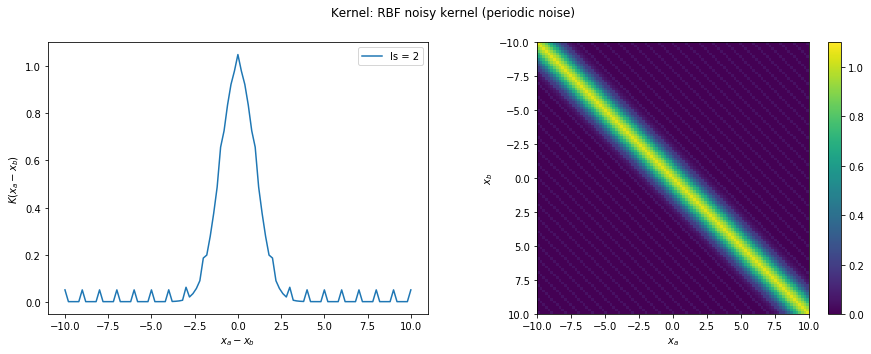

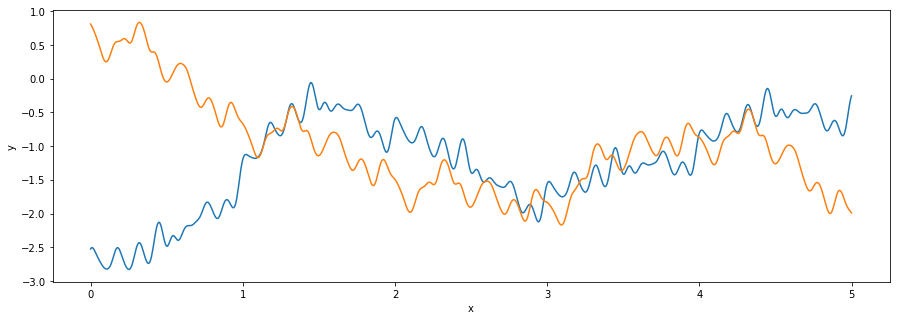

In [7]:
#d)

RBF_period_kernel = RBF() + 0.05*ExpSineSquared(length_scale = 0.25)

plt.figure(figsize=(15,5))
plt.suptitle("Kernel: RBF noisy kernel (periodic noise)")
plt.subplot(1,2,1)
plt.xlabel(r"$x_{a} - x_{b}$")
plt.ylabel(r"$K(x_{a} - x_{b})$")

plt.plot(np.linspace(-10,10,101), RBF_period_kernel.__call__(X=np.abs(np.linspace(-10,10,101))[:, np.newaxis])[50], label = "ls = 2")
plt.legend()

plt.subplot(1,2,2)
im = plt.imshow(RBF_period_kernel.__call__(X=(np.linspace(-10,10,101))[:, np.newaxis]), extent = [-10,10,10,-10], vmin =0 , vmax = 1.1)

plt.xlabel(r"$x_{a}$")
plt.ylabel(r"$x_{b}$")
plt.colorbar()


plt.show()





gp = GaussianProcessRegressor(kernel=RBF_period_kernel, optimizer=None)
    
X_ = np.linspace(0, 5, 1000)

plt.figure(figsize=(15, 5))
plt.xlabel("x")
plt.ylabel("y")
#plt.ylim(-4,4)

for i in range(2):
    y_sample = gp.sample_y(X_[:, np.newaxis], random_state=i)

    plt.plot(X_, y_sample)

#### Interpretation:    
Smooth process with a regular, periodic contribution/noise.

# Ex 4 

a) Fit RBF Gaussian Process Regressor to 10/50 points taken randomly from defined below function. Plot GP prediction and 1-sigma margins. Mark observed points. Calculate mean squared difference between the prediction and true function.    

b) In order to accurately fit the true distribution it is vital to choose correct RBF length_scale parameter. Redo point a) without the constraint **optimizer= None** in gp initialization. Compare achieved MSE and print the optimal length_scale.

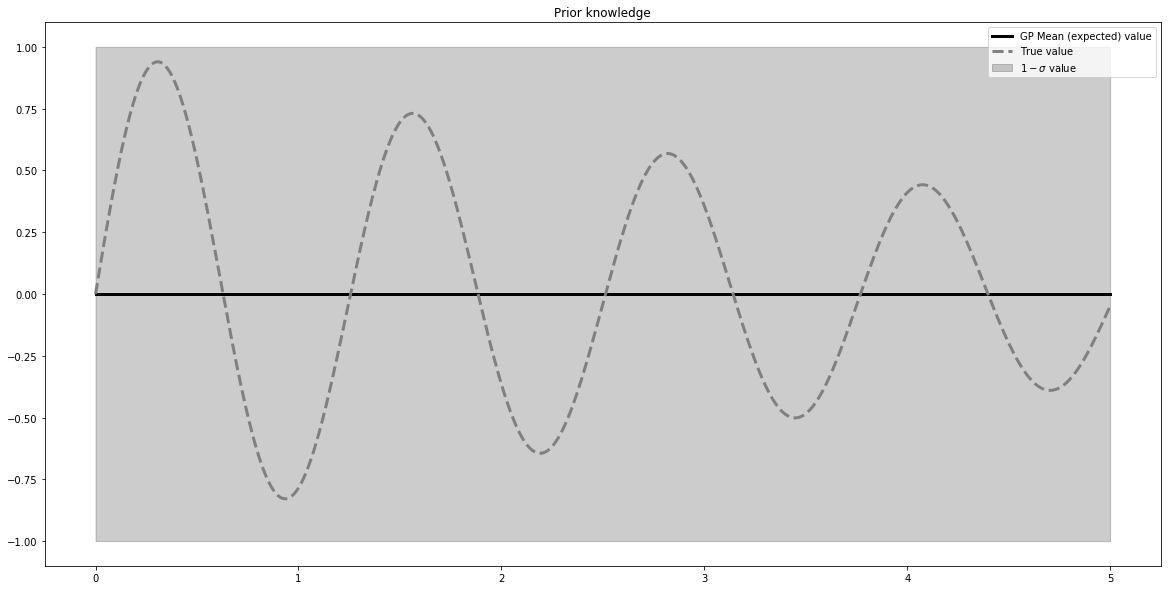

Mean squared difference: 0.2159584282083215


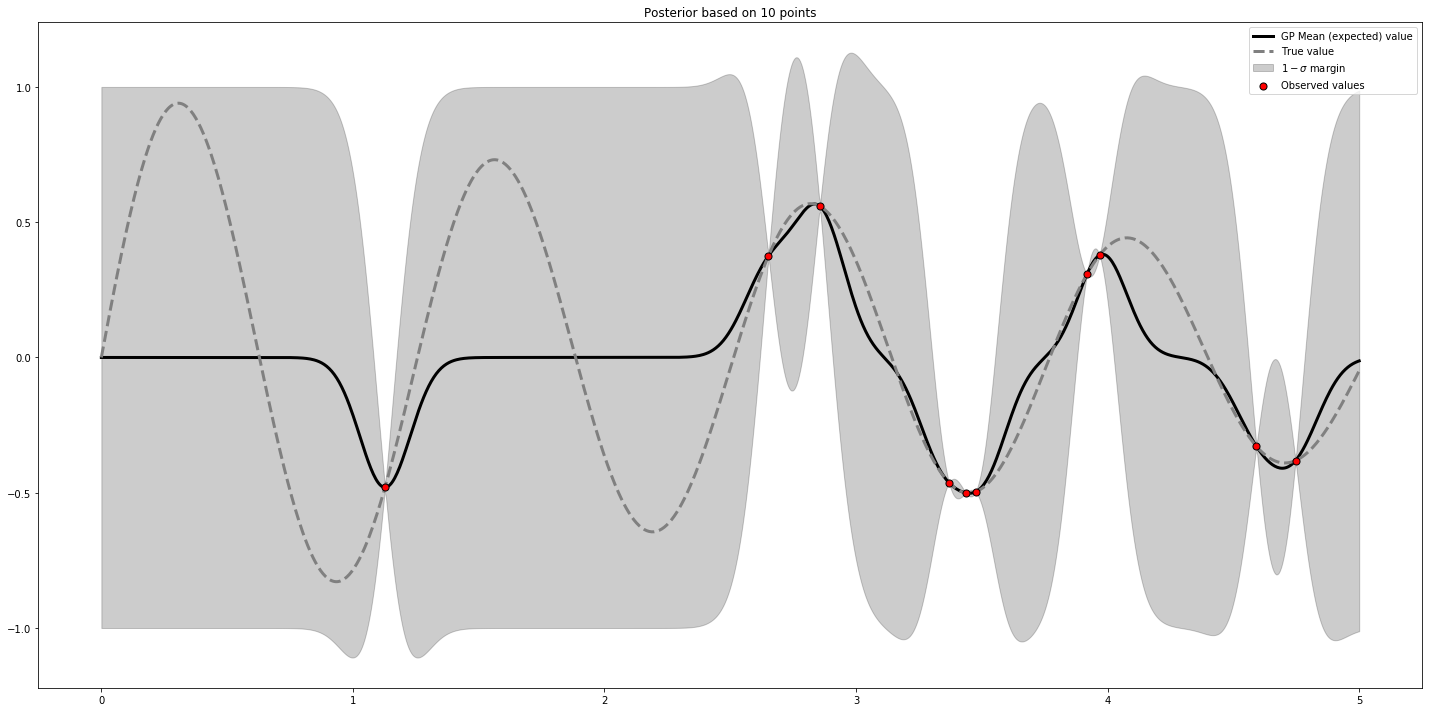

Mean squared difference: 0.15233927679196752


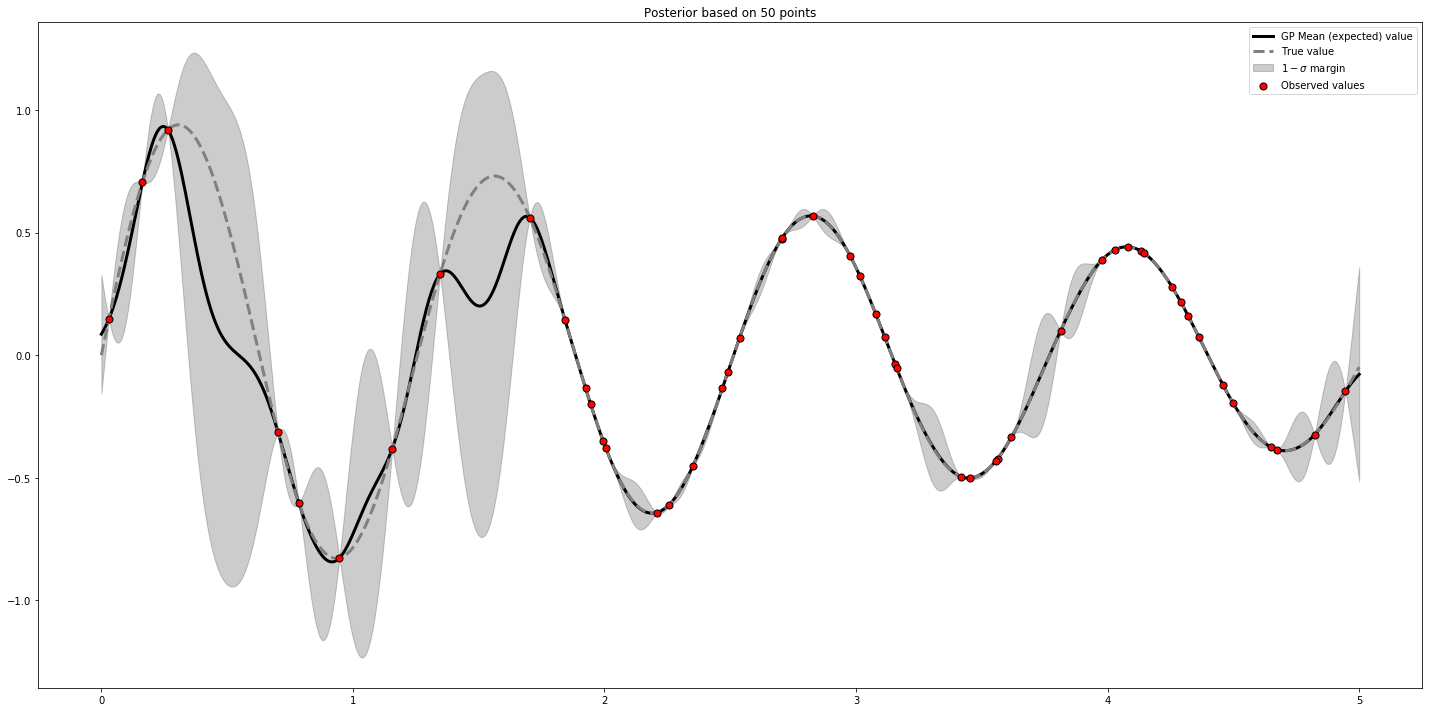

Mean squared difference: 0.019225588725157842


In [8]:
def f(x):
    return np.sin(x*5) *np.exp(-x/5)

kernel = RBF(length_scale=0.1)
gp = GaussianProcessRegressor(kernel=kernel, optimizer= None)

X_ = np.linspace(0, 5, 1000)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
y_true = f(X_)


plt.figure(figsize = (20,10))
plt.plot(X_, y_mean, 'k', lw=3, zorder=9, label = "GP Mean (expected) value")
plt.plot(X_, y_true, 'grey', lw=3, zorder=9, linestyle = "--", label = "True value")
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                 alpha=0.2, color='k', label = r"$1-\sigma$ value")

plt.legend()
plt.title("Prior knowledge")

plt.show()
print("Mean squared difference: {0}".format(np.mean((y_mean.T - y_true)**2)))
    
for points in [10, 50]:
    plt.figure(figsize = (20,10))

    

    # Generate data and fit GP
    X = np.random.uniform(size = points) * 5
    X = X[:, np.newaxis]
    y = f(X)
    gp.fit(X, y)

    # Plot posterior
    plt.figure
    X_ = np.linspace(0, 5, 1000)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9, label = "GP Mean (expected) value")
    plt.plot(X_, y_true, 'grey', lw=3, zorder=9, linestyle = "--", label = "True value")
    plt.fill_between(X_, (y_mean.T - y_std)[0], (y_mean.T + y_std)[0], alpha=0.2, color='k', label = r"$1-\sigma$ margin")

    
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0), label = "Observed values")
    plt.title("Posterior based on {0} points".format(points))
    plt.tight_layout()
    plt.legend()
    plt.show()
    print("Mean squared difference: {0}".format(np.mean((y_mean.T - y_true)**2)))



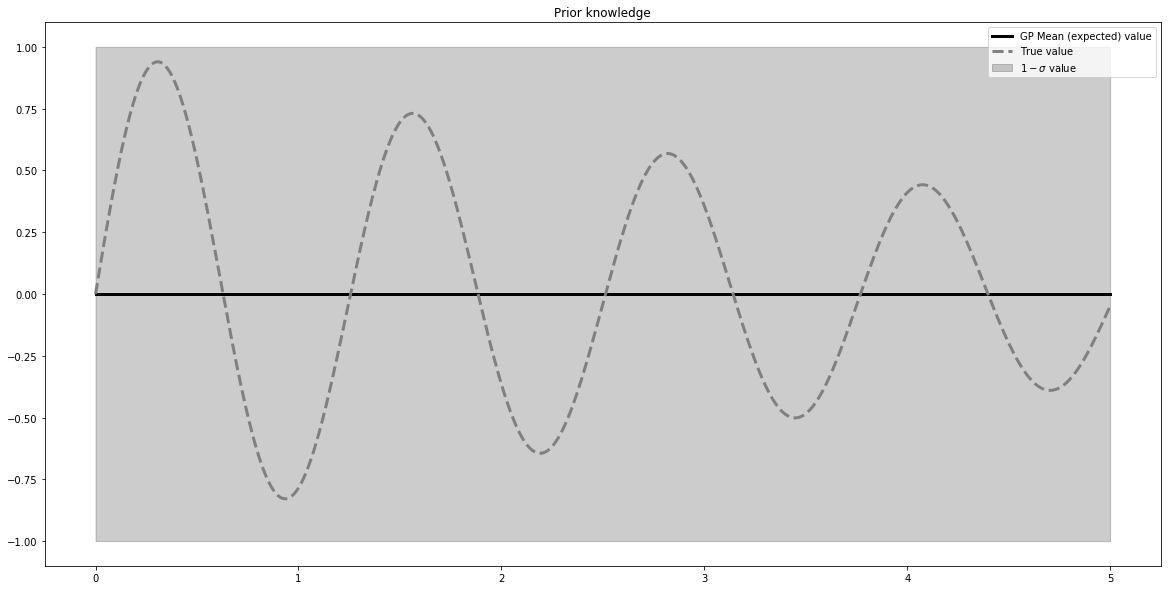

Mean squared difference: 0.2159584282083215


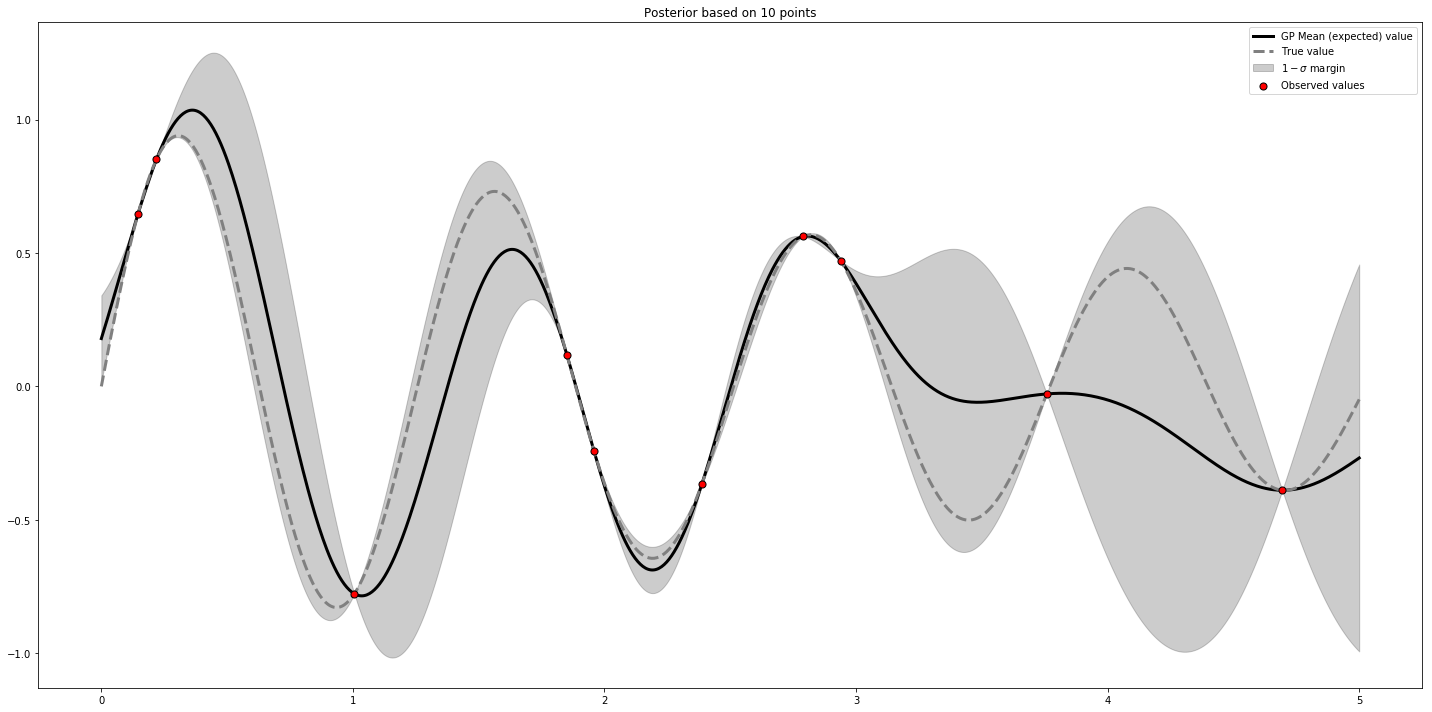

Mean squared difference: 0.062321756233827186


C:\Users\kalasoch\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:357: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


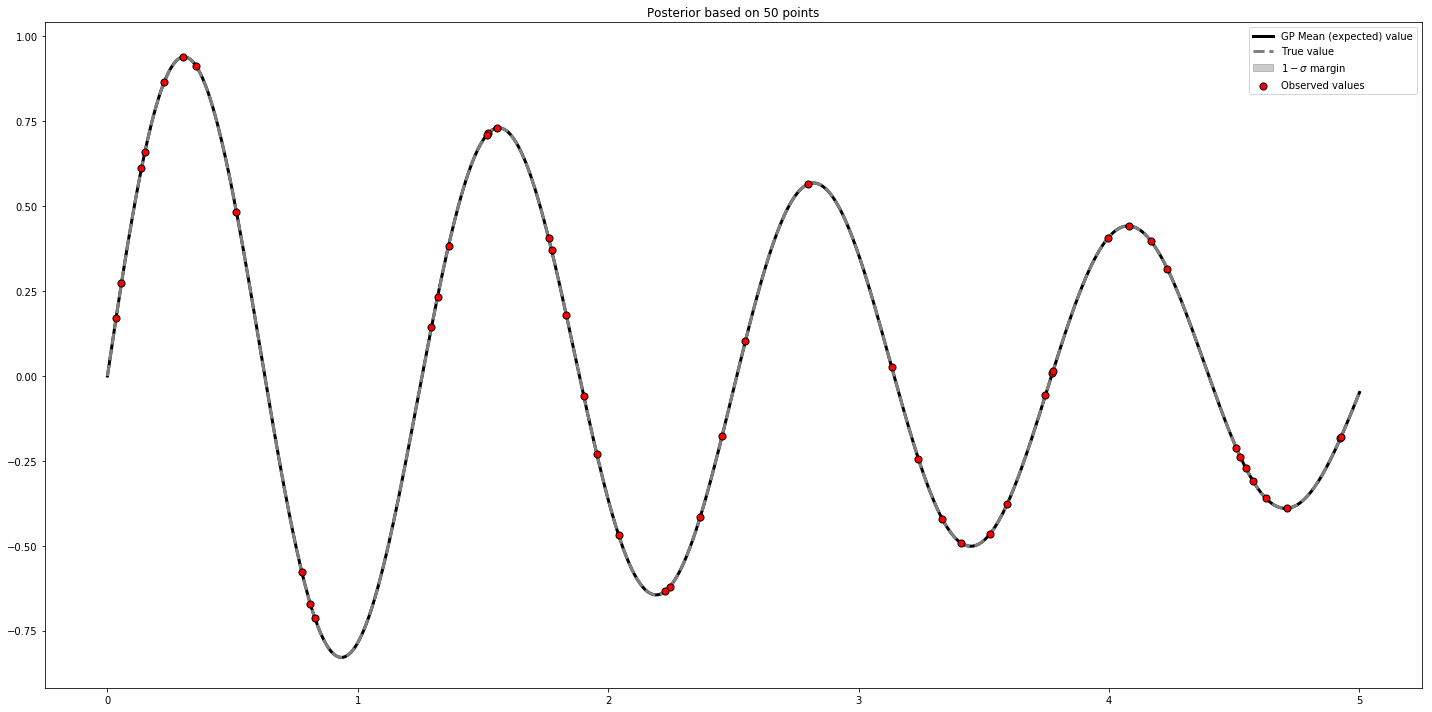

Mean squared difference: 2.8792258278917774e-10
Optimal parameters: RBF(length_scale=0.512)


In [9]:
def f(x):
    return np.sin(x*5) *np.exp(-x/5)

kernel = RBF(length_scale=0.1)
gp = GaussianProcessRegressor(kernel=kernel)



X_ = np.linspace(0, 5, 1000)
y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
y_true = f(X_)


plt.figure(figsize = (20,10))
plt.plot(X_, y_mean, 'k', lw=3, zorder=9, label = "GP Mean (expected) value")
plt.plot(X_, y_true, 'grey', lw=3, zorder=9, linestyle = "--", label = "True value")
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                 alpha=0.2, color='k', label = r"$1-\sigma$ value")

plt.legend()
plt.title("Prior knowledge")

plt.show()
print("Mean squared difference: {0}".format(np.mean((y_mean.T - y_true)**2)))
    
for points in [10, 50]:
    plt.figure(figsize = (20,10))

    

    # Generate data and fit GP
    X = np.random.uniform(size = points) * 5
    X = X[:, np.newaxis]
    y = f(X)
    gp.fit(X, y)

    # Plot posterior
    plt.figure
    X_ = np.linspace(0, 5, 1000)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9, label = "GP Mean (expected) value")
    plt.plot(X_, y_true, 'grey', lw=3, zorder=9, linestyle = "--", label = "True value")
    plt.fill_between(X_, (y_mean.T - y_std)[0], (y_mean.T + y_std)[0], alpha=0.2, color='k', label = r"$1-\sigma$ margin")

    
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0), label = "Observed values")
    plt.title("Posterior based on {0} points".format(points))
    plt.tight_layout()
    plt.legend()
    plt.show()
    print("Mean squared difference: {0}".format(np.mean((y_mean.T - y_true)**2)))

print("Optimal parameters: {0}".format(gp.kernel_))

# Classification

Similarily as we did before for regression, we can use GP for classification purposes. Essentially only thing which changes is, that instead of fitting function curves/surfaces, we fit the probability of belonging to certain groups. In fact, if $N$ is the number of classes, we shall fit $N$ different GP Regressors and then label every considered point with such a class, that it's respective regressor achieved the highest result on that point. Luckilly for us, it is all already packed in sklearn GaussianProcessClassifier class.

# Ex 5
Perform Gaussian Process Classification on a classical [Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). Firstly, use only two first features and plot probabilities as RGB heatmap. Then, plot two-colour heatmaps for every class separately. Evaluate the prediction with F1 metric. Finally, calculate F1 metric for classification which uses all 4 features.

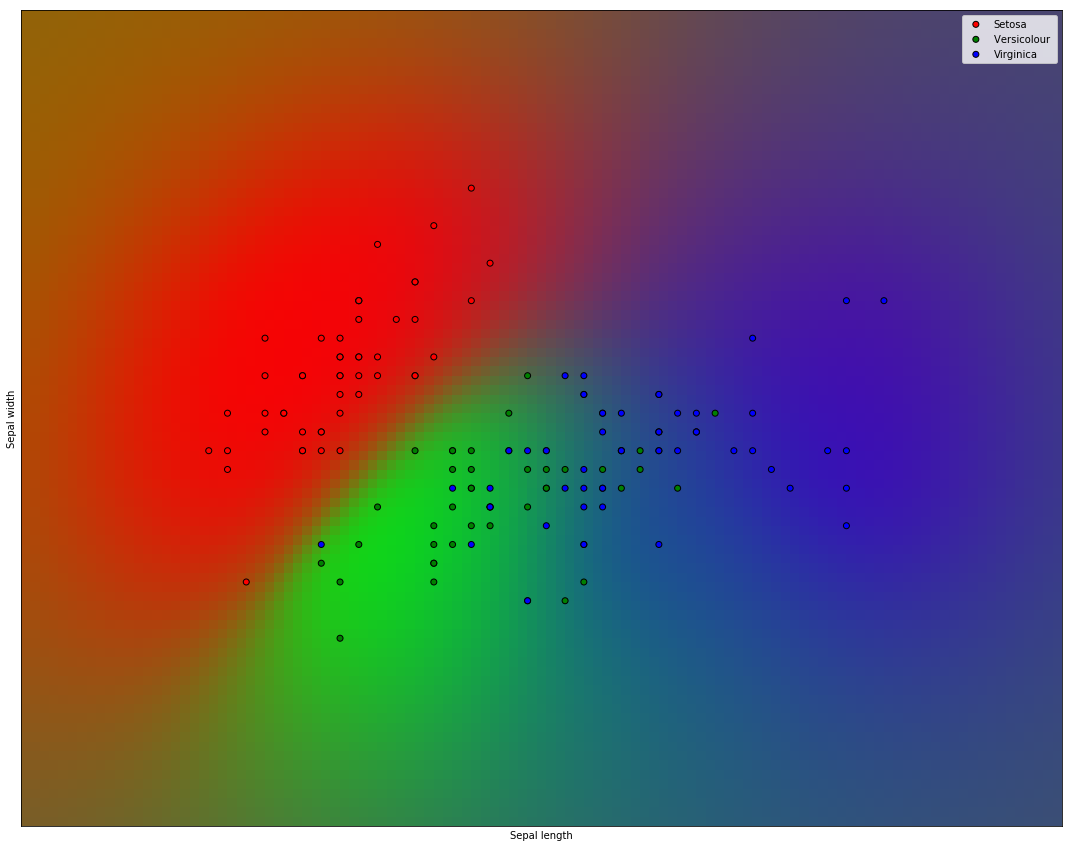

In [10]:
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import f1_score


iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = np.array(iris.target, dtype=int)
h = .05  # step size in the mesh

kernel = 1.0 * RBF()
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


plt.figure(figsize=(15, 25))

Z = gpc_rbf_isotropic.predict_proba(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

# Plot also the training points
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c=np.array(["r", "g", "b"])[y][y==0],
            edgecolors=(0, 0, 0), label="Setosa")

plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c=np.array(["r", "g", "b"])[y][y==1],
            edgecolors=(0, 0, 0), label="Versicolour ")

plt.scatter(X[:, 0][y==2], X[:, 1][y==2], c=np.array(["r", "g", "b"])[y][y==2],
            edgecolors=(0, 0, 0), label="Virginica")

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.tight_layout()
plt.legend()
plt.show()

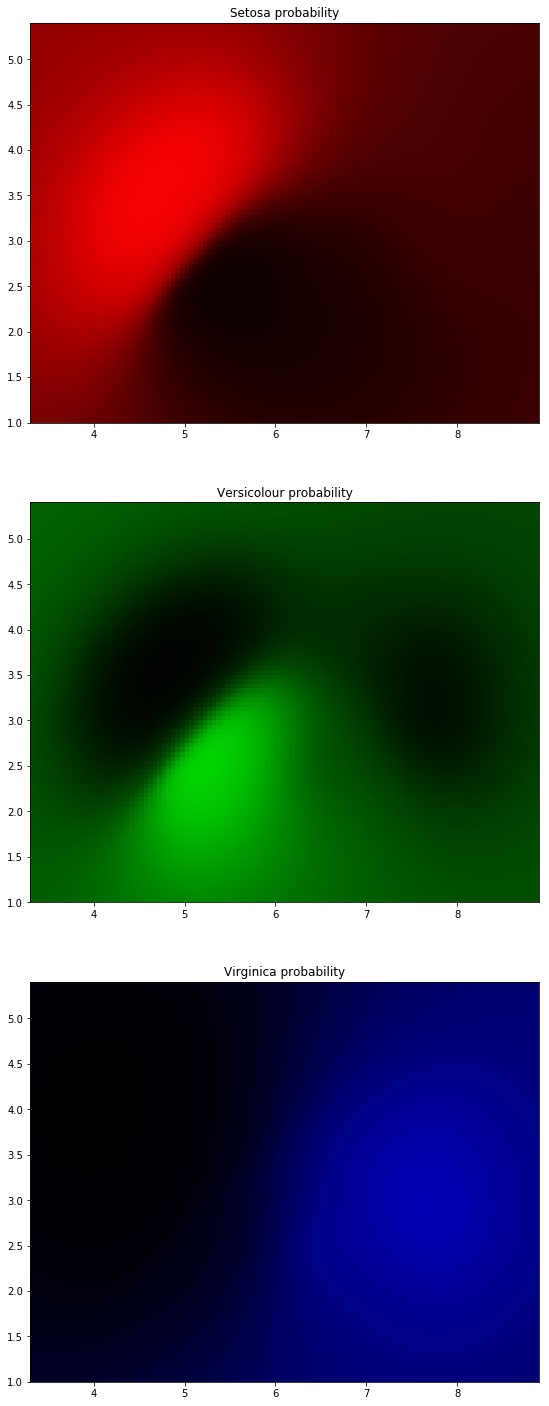

In [11]:
plt.figure(figsize=(20,25))

plt.subplot(3,1,1)
plt.title("Setosa probability")
Z_new = np.copy(Z)
Z_new[:,:,1:] = 0
plt.imshow(Z_new, extent=(x_min, x_max, y_min, y_max), origin="lower")


plt.subplot(3,1,2)
plt.title("Versicolour probability")
Z_new = np.copy(Z)
Z_new[:,:,0] = 0
Z_new[:,:,2] = 0
plt.imshow(Z_new, extent=(x_min, x_max, y_min, y_max), origin="lower")

plt.subplot(3,1,3)
plt.title("Virginica probability")
Z_new = np.copy(Z)
Z_new[:,:,:2] = 0
plt.imshow(Z_new, extent=(x_min, x_max, y_min, y_max), origin="lower")

plt.show()


In [12]:
print("F1 score with 2 features:")
print(f1_score(y, gpc_rbf_isotropic.predict(X), average='micro'))

X = iris.data  # we only take the first two features.
y = np.array(iris.target, dtype=int)
h = .05  # step size in the mesh

kernel = 1.0 * RBF()
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

print("F1 score with all features:")
print(f1_score(y, gpc_rbf_isotropic.predict(X), average='micro'))

F1 score with 2 features:
0.8266666666666667
F1 score with all features:
0.9866666666666668


# CO2 at Mauna Loa

Since 1958 Mauna Loa Observatory in Hawaii has been collecting monthly average atmospheric $CO_{2}$ concentration. These measurements provided the first significant evidence of rapidly increasing $CO_{2}$ levels in the atmosphere. Our task will be to model this concentration with the use of Gaussian Processes. Of course, we do not know parameters of kernel and they need to be found by sklearn optimizer provided with some rough estimates.

# Ex 6
I. Create a kernel, which is a sum of four components:    

a) Main component:

$$ C_{1} \cdot RBF, $$
where $C_{1} \in [500, 10000]$ and $l_{RBF} \in [30, 100]$.   


b) Seasonal component:

$$ C_{2} \cdot ExpSineSq, $$
where $C_{2} \in [2, 20]$ and $l_{ExpSineSq} \in [2, 20]$ and periodicity is 1 year (this has to be bound!).       


c) Short to medium term irregularities:

$$ C_{3} \cdot RBF, $$
where $C_{3} \in [0.1, 1]$ and $l_{RBF} \in [100, 400]$.    


d) Observational noise:

$$ C_{4} \cdot RBF + White Noise, $$
where $C_{4} \in [0.01, 1]$ and $l_{RBF} \in [0.01, 1]$ and noise level $\in [0.001, \infty)$.    

Model constants as constant kernels.

II. Fit data up to year 2004 in order to calculate correct parameters. Play with initial parameters, in order to get best fit. 

III. Plot real data together with predictions up to the year 2030.


In [13]:
import pandas as pd

co2_df = pd.read_csv(
    # Source: https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv
    './monthly_in_situ_co2_mlo.csv', 
    header=54, # Data starts here
    skiprows=[55, 56], # Headers consist of multiple rows
    usecols=[3, 4], # Only keep the 'Date' and 'CO2' columns
    na_values='-99.99',  # NaNs are denoted as '-99.99'
    dtype=np.float64
)

co2_df.dropna(inplace=True)
co2_df.rename(columns=lambda x: x.strip(), inplace=True)

date = np.array(co2_df["Date"])
CO2 = np.array(co2_df["CO2"])

date_2004 = date[date<2004]
CO2_2004 = CO2[date<2004]

In [14]:
#Main rising trend:
k_main =  ConstantKernel(2e3, constant_value_bounds = (5e2,1e4)) 
k_main *= RBF(50, length_scale_bounds= (30,100))

#Seasonal component
k_season = ConstantKernel(4, constant_value_bounds = (2,20))
k_season *= ExpSineSquared(length_scale=1.0, periodicity=1.0,
                           periodicity_bounds="fixed", length_scale_bounds= (0.5,4))

# medium term irregularities
k3 = ConstantKernel(0.5, constant_value_bounds = (1e-1,1))
k3 *= RBF(length_scale=180, length_scale_bounds= (100,400))
                                                               
k4 = ConstantKernel(0.1, constant_value_bounds = (1e-2,1))
k4 *= RBF(length_scale=0.1, length_scale_bounds= (1e-2,1))
k4 += WhiteKernel(noise_level=0.01, noise_level_bounds=(1e-3, np.inf))

kernel = k_main + k_season + k3 +k4

In [15]:
# II
gp = GaussianProcessRegressor(kernel=kernel)
gp.fit(date_2004.reshape(-1, 1),CO2_2004)
gp.kernel_

100**2 * RBF(length_scale=30) + 3.16**2 * ExpSineSquared(length_scale=1.48, periodicity=1) + 0.708**2 * RBF(length_scale=180) + 0.47**2 * RBF(length_scale=0.299) + WhiteKernel(noise_level=0.0441)

Text(0.5, 0, 'year')

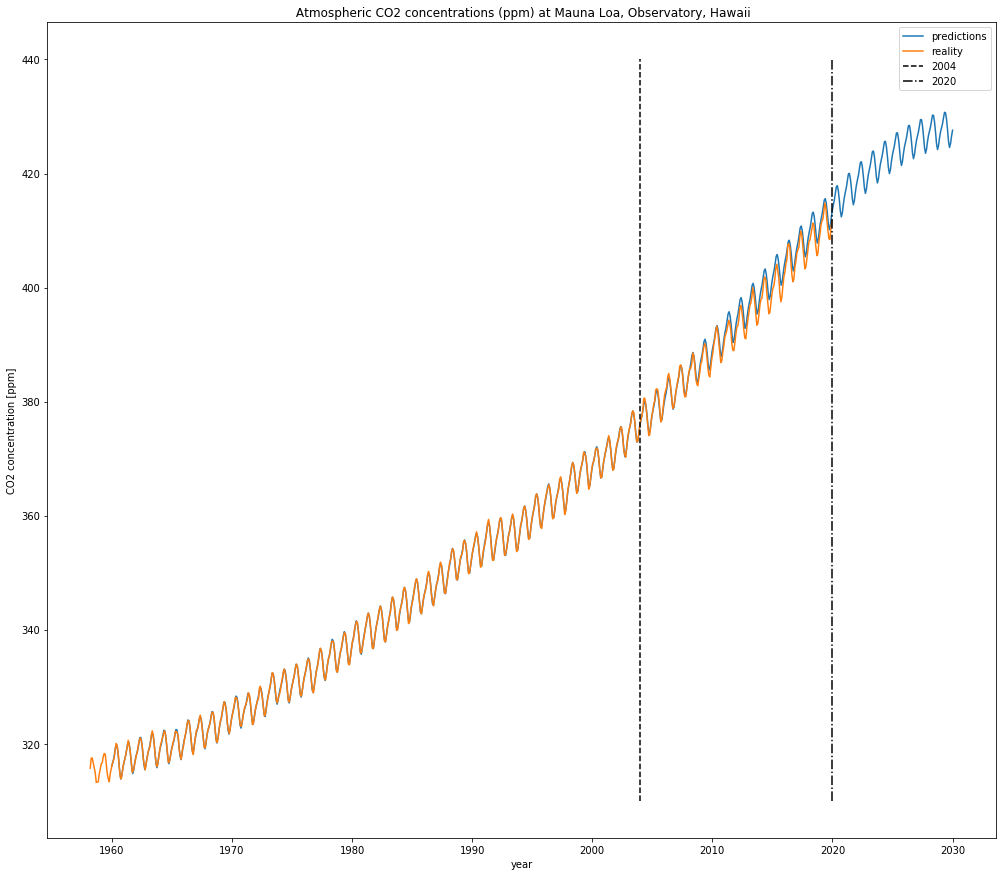

In [16]:
# III

plt.figure(figsize=(17,15))
date_future = np.linspace(1960,2030, 70*12)
plt.plot(date_future, gp.predict(date_future.reshape(-1, 1)), label = "predictions")
plt.plot(date, CO2, label = "reality")
plt.plot([2004, 2004], [310, 440], "k--", label = "2004")
plt.plot([2020, 2020], [310, 440], "k-.", label = "2020")

plt.legend()
plt.title(" Atmospheric CO2 concentrations (ppm) at Mauna Loa, Observatory, Hawaii")
plt.ylabel("CO2 concentration [ppm]")
plt.xlabel("year")